In [1]:
import numpy as np
import matplotlib.pyplot as plt

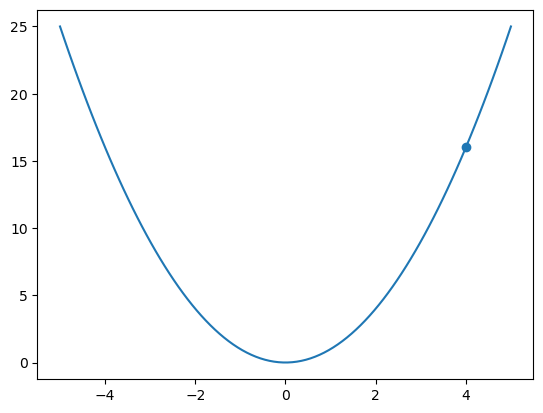

In [2]:
func = lambda x : x**2

xpoints = np.linspace(-5,5,100)
ypoints = np.array([func(x) for x in xpoints])

plt.plot(xpoints, ypoints)

x0 = 4
plt.scatter(x0, func(x0))

plt.show()

Sufficient precision reached at iteration 61
Gradient at 4.903985730770847e-06 = 2.404907604760408e-11
x = 4.903985730770847e-06
y = 2.404907604760408e-11


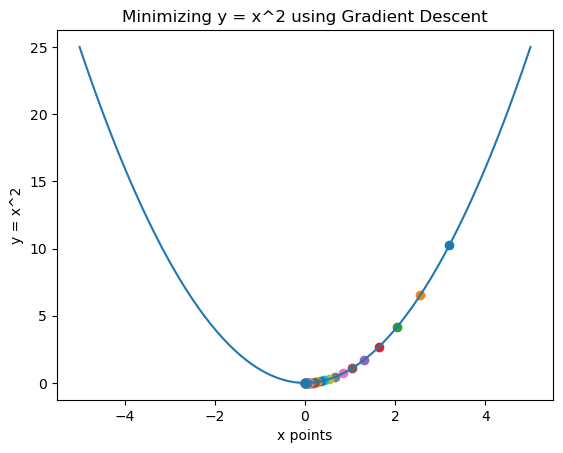

In [7]:
grad_f = lambda x : 2 * x
eta = 0.1
delta = 0.00001

x_vals = [x0,]

for i in range(100):
    xt = x_vals[i] - eta * grad_f(x_vals[i])
    x_vals.append(xt)
    plt.scatter(xt, func(xt))
    # print(f'xt = {xt} and x0 = {x_vals[i]}')
    # if (np.abs(xt - x_vals[i])) < delta :
    if grad_f(xt) < delta:
        print(f'Sufficient precision reached at iteration {i+1}')
        print(f'Gradient at {xt} = {func(xt)}')
        print(f'x = {xt}\ny = {func(xt)}')
        break

plt.plot(xpoints, ypoints)

plt.xlabel('x points')
plt.ylabel('y = x^2')
plt.title('Minimizing y = x^2 using Gradient Descent')
plt.show()

at i = 0, appending 4.8 where f(xt) = 23.04 and gradient = 12
at i = 10, appending 0.5153960755200001 where f(xt) = 0.26563311466141765 and gradient = 1.2884901888000002
at i = 20, appending 0.05534023222112866 where f(xt) = 0.0030625413022884467 and gradient = 0.13835058055282165
at i = 30, appending 0.0059421121885698275 where f(xt) = 3.530869726155011e-05 and gradient = 0.014855280471424568
at i = 40, appending 0.0006380294379767599 where f(xt) = 4.0708156372494016e-07 and gradient = 0.0015950735949418998
at i = 50, appending 6.850788924988612e-05 where f(xt) = 4.693330889474662e-09 and gradient = 0.0001712697231247153
Required precision reached at iteration: 53
x = 3.507603929594169e-05
y = 1.2303285326904458e-09


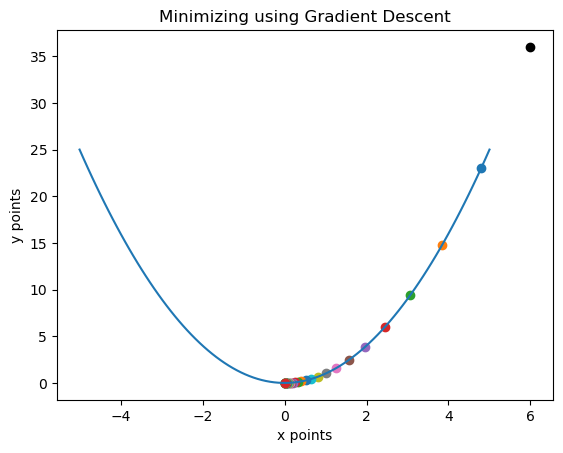

3.507603929594169e-05

In [18]:
def gradient_descent(fun, grad_func, eta, delta, x0, interval, iterations):
    xpoints = np.linspace(interval[0], interval[1], 100)
    ypoints = np.array([fun(x) for x in xpoints])
    plt.plot(xpoints, ypoints)
    plt.scatter(x0, fun(x0), c='black')
    x_vals = [x0,]
    flag = False
    grad_init = grad_func(x0)
    for i in range(iterations):
        xt = x_vals[i] - eta * grad_func(x_vals[i])
        if grad_func(xt) > (2*grad_init): 
            print('Gradient Oscillating')
            print(f'at i = {i}, appending {xt} where f(xt) = {fun(xt)} and gradient = {grad_func(x_vals[i])}')
            return
        x_vals.append(xt)
        if (i % (iterations//10)) == 0: 
            print(f'at i = {i}, appending {xt} where f(xt) = {fun(xt)} and gradient = {grad_func(x_vals[i])}')
        plt.scatter(xt, fun(xt))
        if np.abs(xt-x_vals[i]) < delta :
            print(f'Required precision reached at iteration: {i}')
            print(f'x = {xt}\ny = {fun(xt)}')
            flag = True
            break
    if(not flag):
        print('Convergence failed.')
        return
    plt.xlabel('x points')
    plt.ylabel('y points')
    plt.title('Minimizing using Gradient Descent')
    plt.show()
    return x_vals.pop()

gradient_descent(func, grad_f, eta, delta, 6, (-5,5), 100)

at i = 0, appending -0.8000000000000007 where f(xt) = -0.5120000000000013 and gradient = 48
Gradient Oscillating
at i = 6, appending -12.462972416785766 where f(xt) = -1935.8196836739096 and gradient = 74.72235748287612


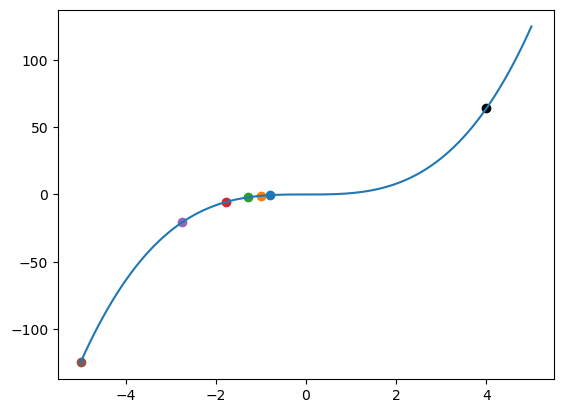

In [19]:
f2 = lambda x : x**3
grad_f2 = lambda x : 3*(x**2)

gradient_descent(f2, grad_f2, 0.1, 0.00001, 4, (-5,5), 100)

Here, $$x0 = 7 \\and\\ \eta = 0.01$$ is the perfect initialisation.

gradient at x0 = 500

500 * 0.01 = 5

x0 - 5 = 2, and f(2) = 0

at i = 0, appending 2.0 where f(xt) = 0.0 and gradient = 500
Required precision reached at iteration: 1
x = 2.0
y = 0.0


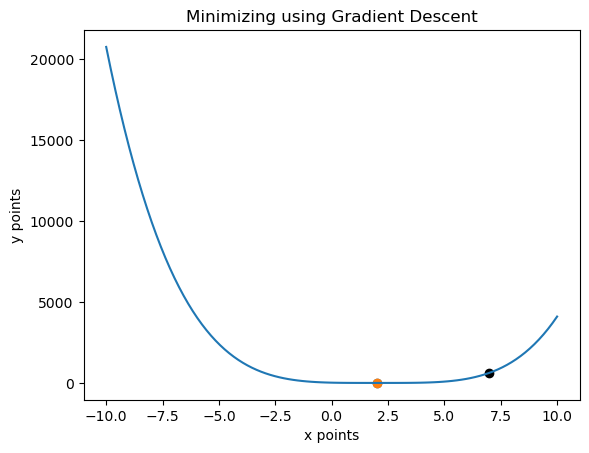

2.0

In [20]:
f2 = lambda x : x**4 - 8 * x**3 + 24 * x**2 - 32 * x + 16
grad_f2 = lambda x : 4*x**3 - 24*x**2 + 48*x - 32

gradient_descent(f2, grad_f2, 0.01, 0.00001, 7, (-10,10), 100)